# 0. Importing packages

In [2]:
# Load the autoreload extension to automatically reload modules before executing code (to avoid restarting the kernel)
%load_ext autoreload 
# NB. uncomment the line above first time you run this cell
%autoreload 2

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from resources.network_functions import NetworkEdgeListConstructor, GraphConstructor, NetworkVisualizer3

## 0.1 File Paths

In [3]:
### File path ###
fp_main = Path('/Volumes/SAM-SODAS-DISTRACT/Coding Distraction/github_as_a_market_device')
fp_main_output = Path(fp_main / 'output')

# 1 Load in data

In [4]:
# Read in the data
github_data = pd.read_parquet(fp_main_output / 'unique_users_first_second.gzip.parquet')

In [6]:
constructor = NetworkEdgeListConstructor(github_data)
all_edges_user_level, attention_edges_user_level, collaboration_edges_user_level = constructor.get_edge_lists()
print(f'Number of edges in the user-level network: {len(all_edges_user_level)}')
print(f'Number of attention edges in the user-level network: {len(attention_edges_user_level)}')
print(f'Number of collaboration edges in the user-level network: {len(collaboration_edges_user_level)}')

# Save the edgelist using gzip parquet
all_edges_user_level.to_parquet(fp_main_output / 'all_edges_user_level.gzip.parquet')
attention_edges_user_level.to_parquet(fp_main_output / 'attention_edges_user_level.gzip.parquet')
collaboration_edges_user_level.to_parquet(fp_main_output / 'collaboration_edges_user_level.gzip.parquet')

Number of edges in the user-level network: 2321
Number of attention edges in the user-level network: 2256
Number of collaboration edges in the user-level network: 65


In [5]:
gc_attention = GraphConstructor(all_edges_user_level, graph_type='attention')
attention_graph = gc_attention.get_graph()
print("Attention Graph edges:", attention_graph.edges(data=True))

gc_collaboration = GraphConstructor(all_edges_user_level, graph_type='collaboration')
collaboration_graph = gc_collaboration.get_graph()
print("Collaboration Graph edges:", collaboration_graph.edges(data=True))

Attention Graph edges: [('fellowmind', 'fellowmind', {'weight': 1, 'follows': 0, 'stars': 0, 'watches': 1, 'd_intra_level': 1, 'd_inter_level': 0}), ('capgemini', 'capgemini', {'weight': 1, 'follows': 0, 'stars': 0, 'watches': 8, 'd_intra_level': 1, 'd_inter_level': 0}), ('charlie tango', 'charlie tango', {'weight': 11, 'follows': 12, 'stars': 14, 'watches': 127, 'd_intra_level': 1, 'd_inter_level': 0}), ('charlie tango', 'signifly', {'weight': 1, 'follows': 1, 'stars': 0, 'watches': 0, 'd_intra_level': 0, 'd_inter_level': 1}), ('kruso', 'kruso', {'weight': 1, 'follows': 0, 'stars': 0, 'watches': 3, 'd_intra_level': 1, 'd_inter_level': 0}), ('must', 'must', {'weight': 3, 'follows': 0, 'stars': 1, 'watches': 107, 'd_intra_level': 1, 'd_inter_level': 0}), ('shape', 'shape', {'weight': 13, 'follows': 3, 'stars': 14, 'watches': 114, 'd_intra_level': 1, 'd_inter_level': 0}), ('abtion', 'abtion', {'weight': 14, 'follows': 2, 'stars': 9, 'watches': 99, 'd_intra_level': 1, 'd_inter_level': 0})

Plotting Attention Graph
Plot saved as attention_graph.png


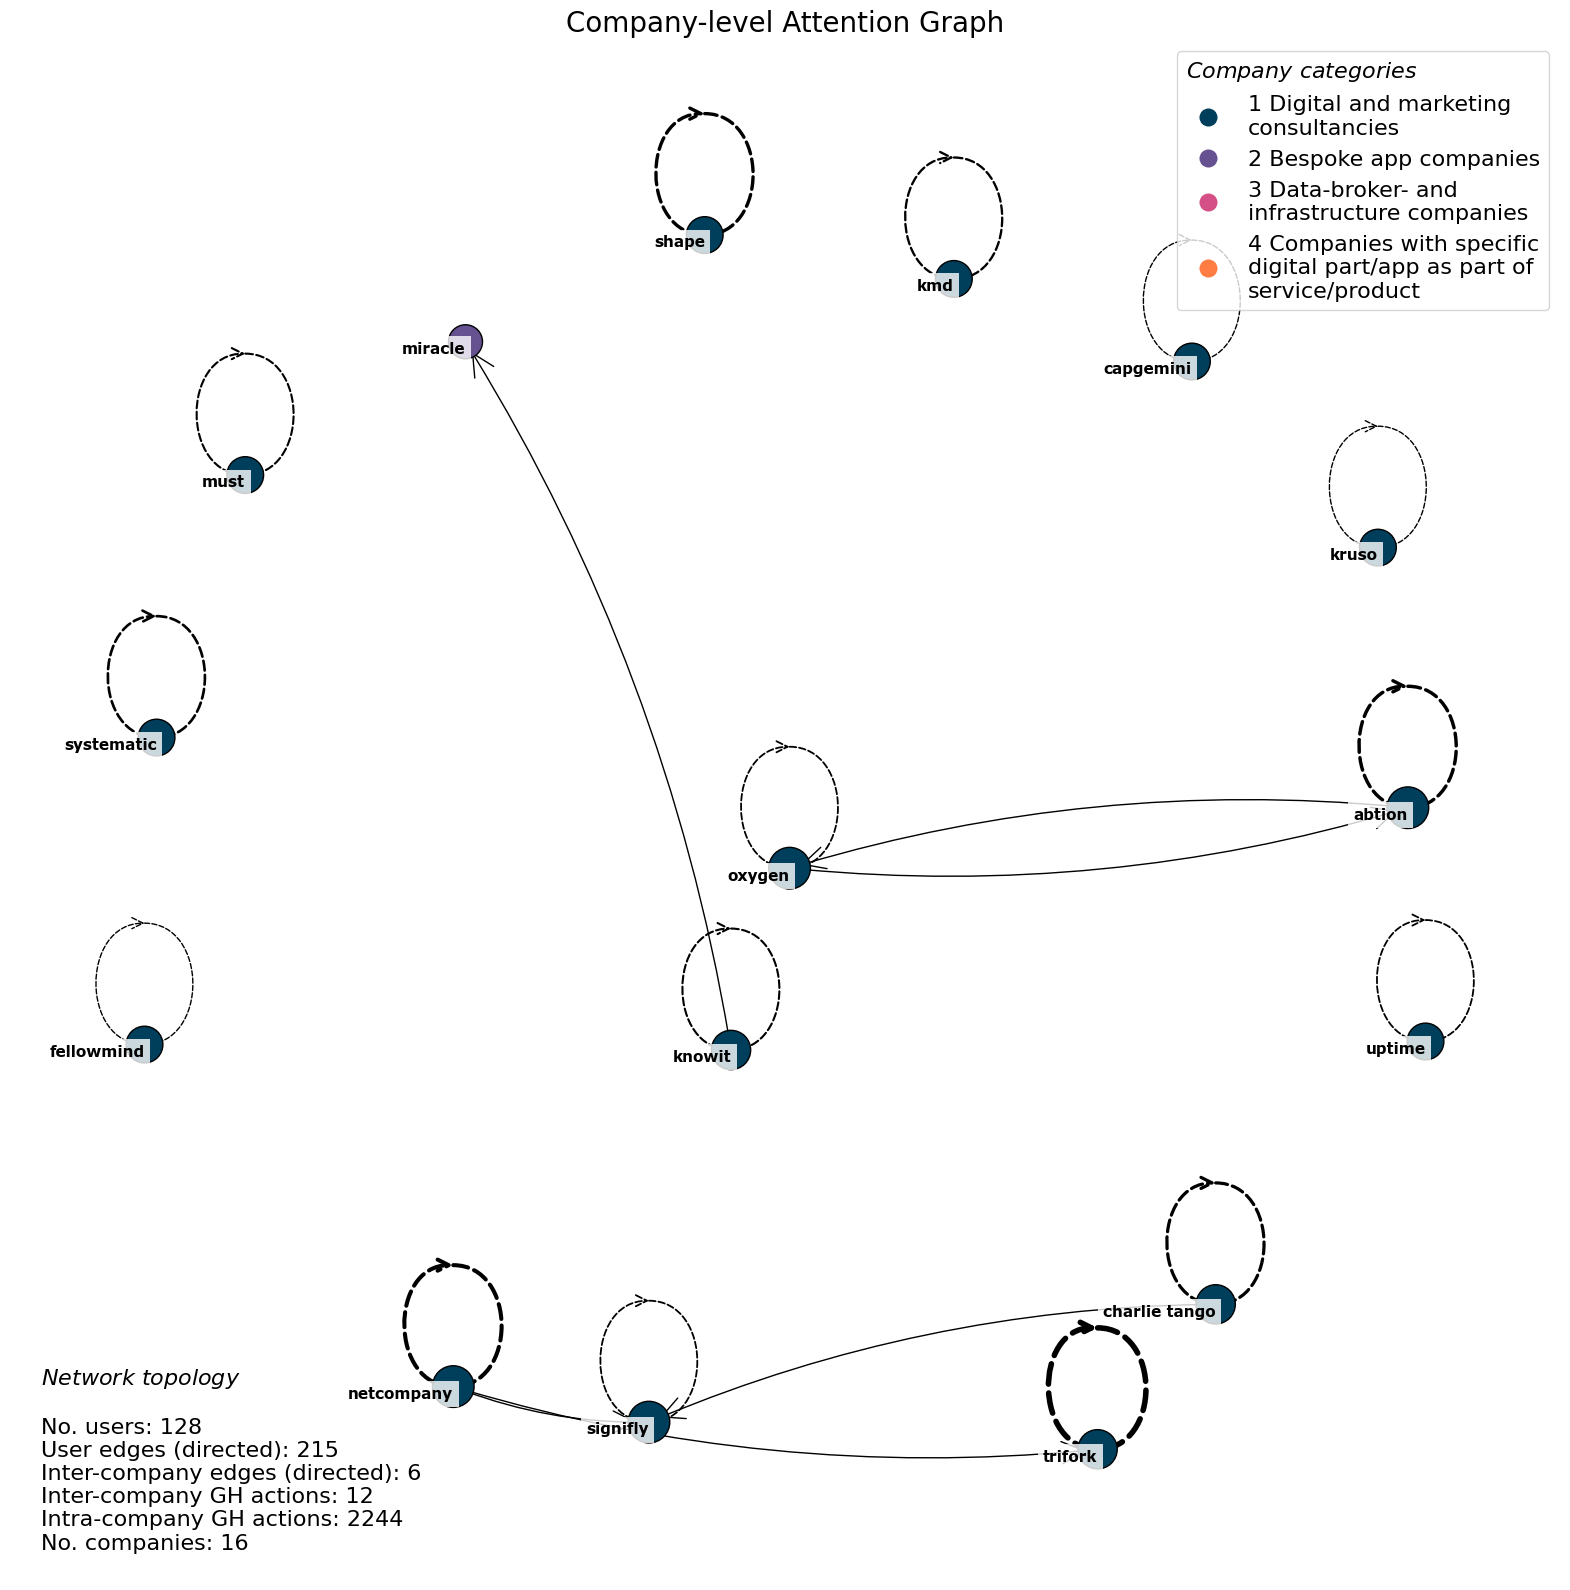

Plotting Collaboration Graph
Plot saved as collaboration_graph.png


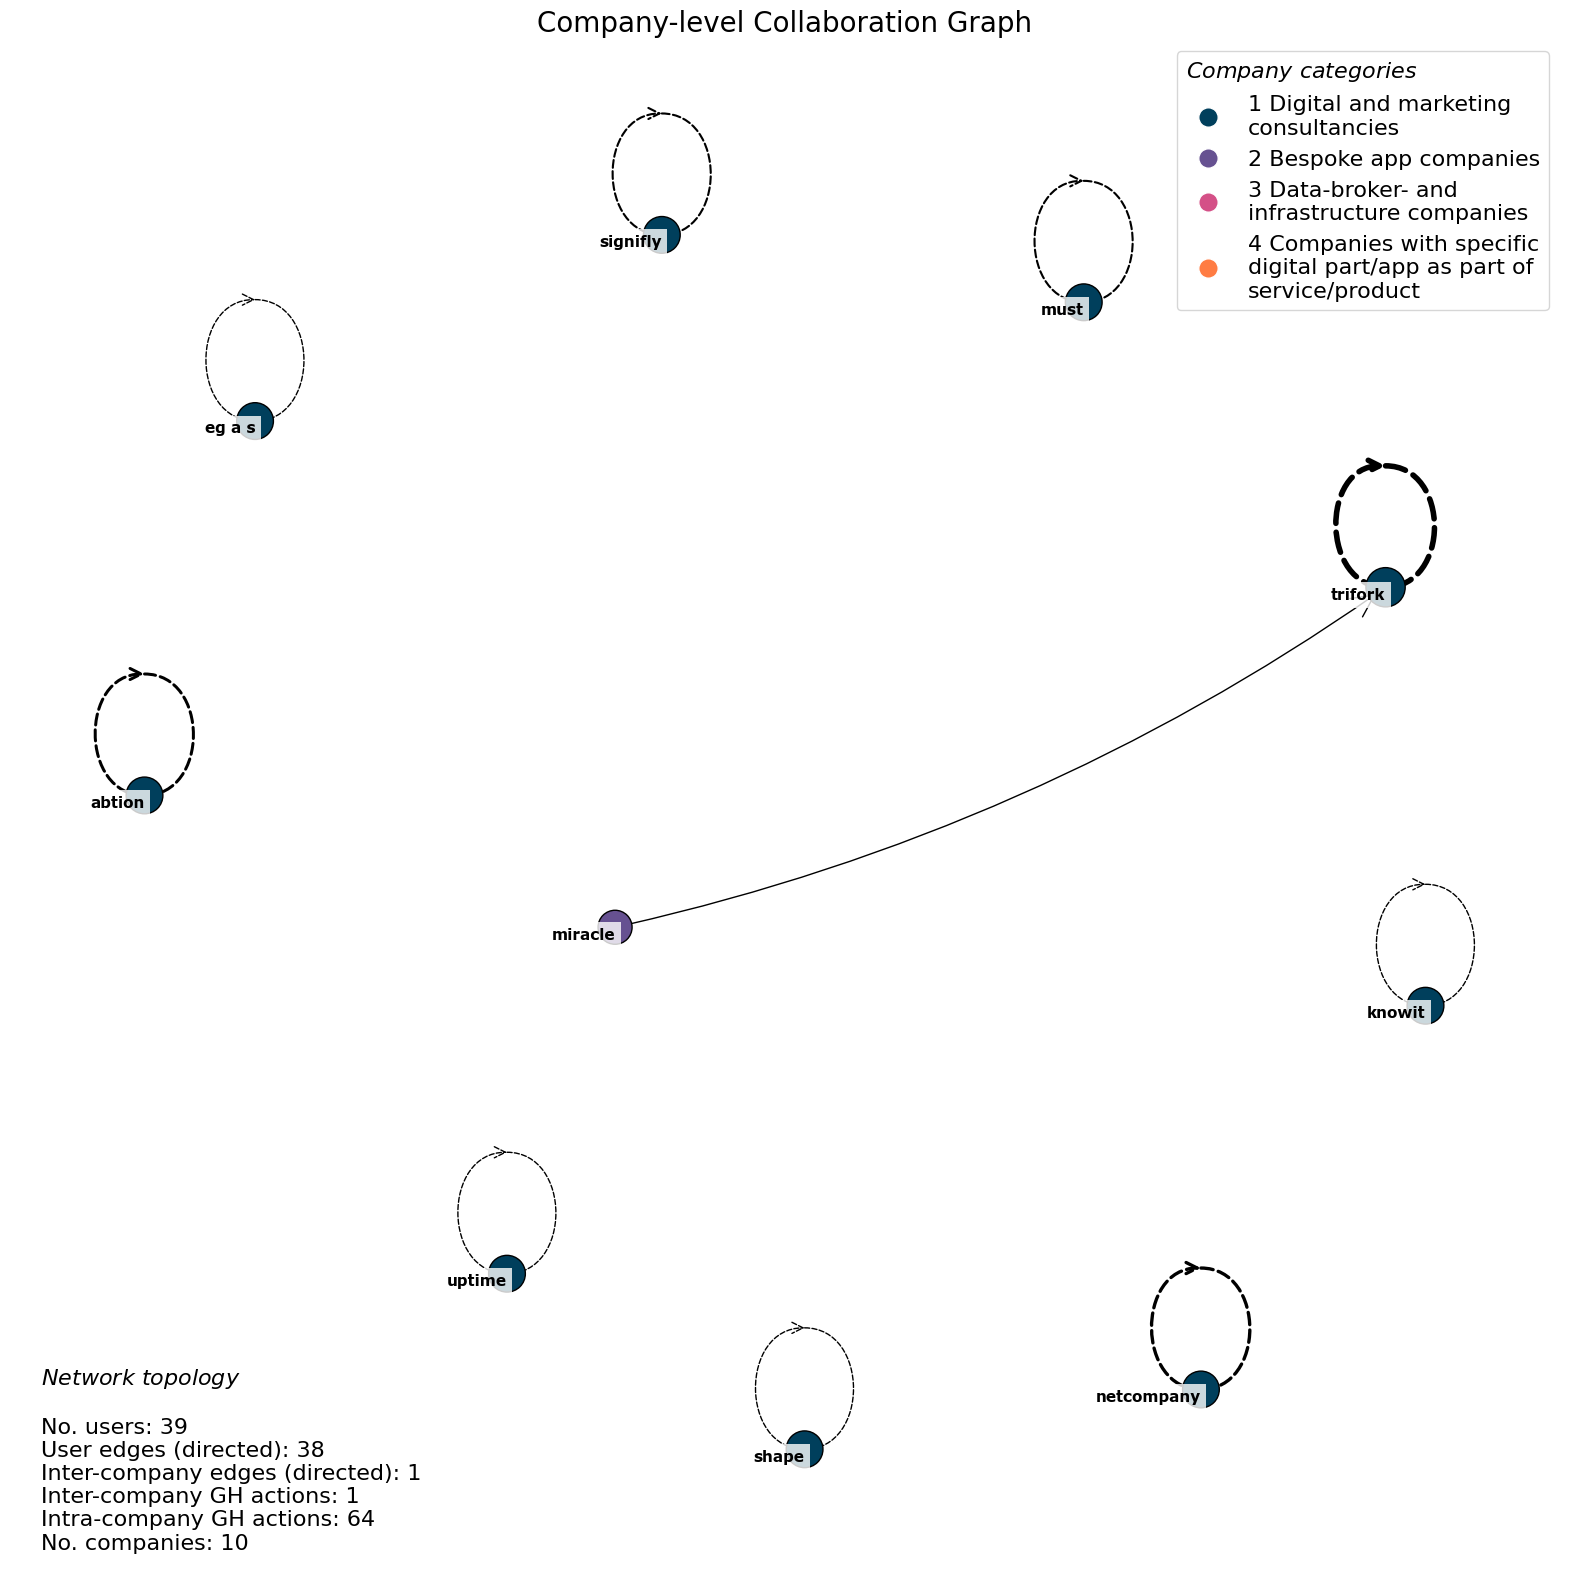

In [9]:
# Visualize Attention Graph
attention_viz = NetworkVisualizer3(attention_graph, edgelist=all_edges_user_level, graph_type='attention')

print("Plotting Attention Graph")
fig_attention = attention_viz.create_plot(title="Company-level Attention Graph");
attention_viz.save_plot_as_png(fig_attention, 'attention_graph.png')
plt.show()

# Visualize Collaboration Graph
collab_viz = NetworkVisualizer3(collaboration_graph, edgelist=all_edges_user_level, graph_type='collaboration')

print("Plotting Collaboration Graph")
fig_collab = collab_viz.create_plot(title="Company-level Collaboration Graph");
collab_viz.save_plot_as_png(fig_collab, 'collaboration_graph.png')
plt.show()
